In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

def draw_3D_surfaces(data_point, x_range,y_range, bins
                    ,title, log_scale, is_colorbar = True, wire_frame=False):
    def log_tick_formatter(val, pos=None):
        return f"$10^{{{int(val)}}}$"
    nb_plot = len(data_point)
    fig = plt.figure(figsize=(3.5 * (nb_plot//2), 7))
    xmin, xmax = x_range
    ymin, ymax = y_range
    bins_x, bins_y = bins
    for i in range(nb_plot):
        ax = fig.add_subplot(nb_plot // 2, 2, i+1, projection='3d')
        
        # plot a 3D surface like in the example mplot3d/surface3d_demo
        
        edges_x = np.linspace(xmin, xmax, bins_x+1)
        edges_y = np.linspace(ymin, ymax, bins_y+1)
        x,y = data_point[i][:,0].numpy(),data_point[i][:,1].numpy() # data_point : [N, m_dim]


        hist, *_ = np.histogram2d(x, y, bins=(edges_x,edges_y),density=True)
        if log_scale:
            eps = 10e-10
            hist = np.log10(hist+eps)

            ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
            ax.zaxis.set_major_locator(mticker.MaxNLocator(integer=True))
            
        mesh_X, mesh_Y = np.meshgrid(edges_x[1:],edges_y[1:])
        if wire_frame:
            surf = ax.plot_wireframe(mesh_X, mesh_Y, hist,rstride=1, cstride=1, linewidth=0.75)
        else:
            surf = ax.plot_surface(mesh_X, mesh_Y, hist, rstride=1, cstride=1, cmap='viridis',
                            linewidth=0, antialiased=False)
        if is_colorbar:
            axins = inset_axes(ax,
                        width="5%",  
                        height="50%",
                        loc='right',
                        borderpad=-5
                        )
            fig.colorbar(surf, cax=axins, orientation="vertical")
        ax.set_title(title[i],pad=-5)

        
    return fig

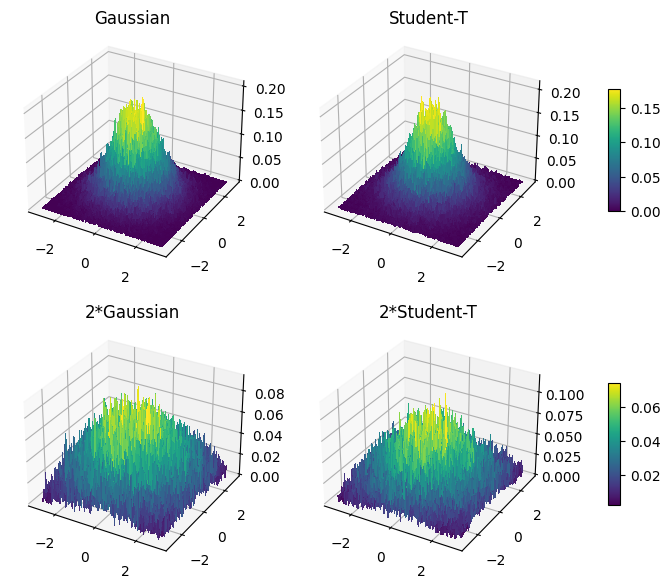

In [2]:
import torch
m_dim = 2
nu = 10
sample_N = 100000
MVN_dist = torch.distributions.MultivariateNormal(torch.zeros(m_dim), torch.eye(m_dim))
prior_chi_dist = torch.distributions.chi2.Chi2(torch.tensor([nu]))
prior_z = MVN_dist.sample(sample_shape=torch.tensor([sample_N]))
v = prior_chi_dist.sample(sample_shape=torch.tensor([sample_N]))
prior_t = prior_z * torch.sqrt(nu / v)

data_point = [prior_z,prior_t,2*prior_z,2*prior_t]
title = ["Gaussian", "Student-T","2*Gaussian", "2*Student-T"]
fig = draw_3D_surfaces(data_point=data_point, x_range=(-3,3),y_range=(-3,3), bins=(100,100)
                    ,title=title, log_scale=False, is_colorbar = True)

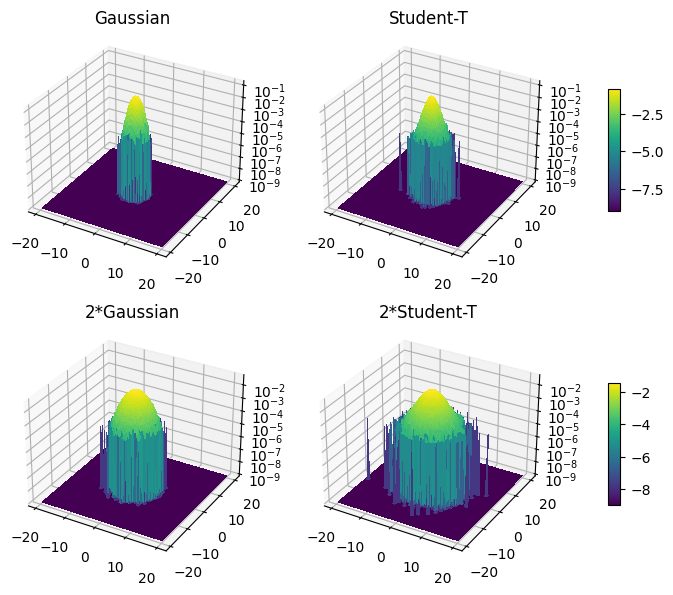

In [3]:
fig = draw_3D_surfaces(data_point=data_point, x_range=(-20,20),y_range=(-20,20), bins=(100,100)
                    ,title=title, log_scale=True, is_colorbar = True)

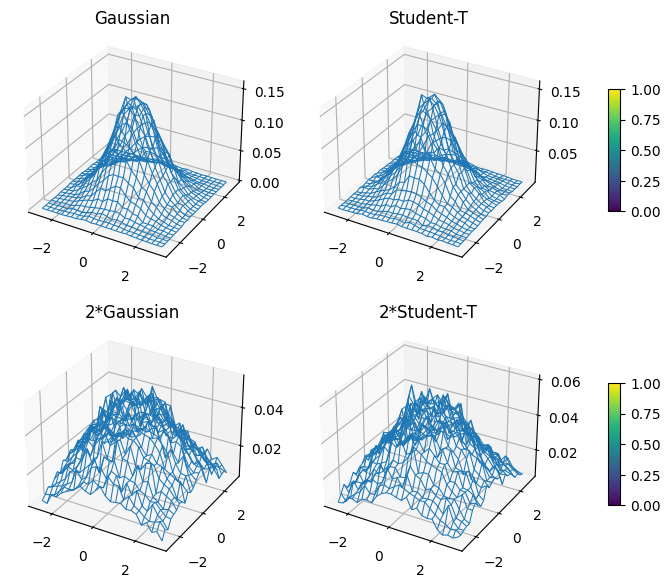

In [4]:
fig = draw_3D_surfaces(data_point=data_point, x_range=(-3,3),y_range=(-3,3), bins=(25,25)
                    ,title=title, log_scale=False, is_colorbar = True, wire_frame=True)

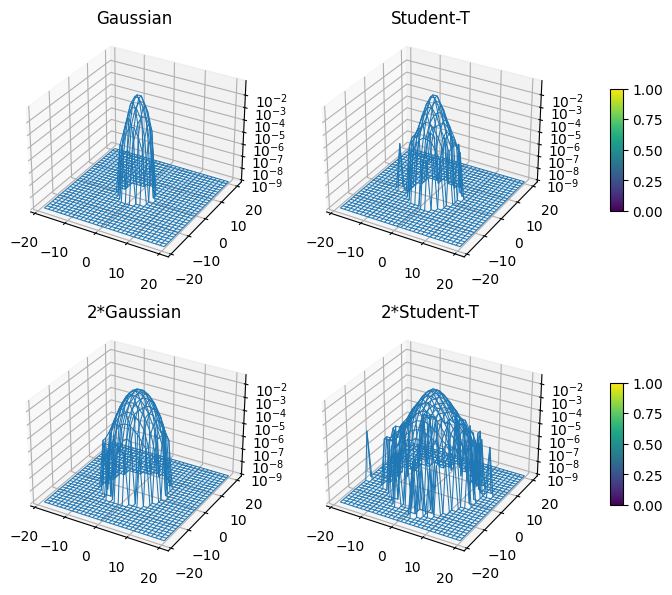

In [5]:
fig = draw_3D_surfaces(data_point=data_point, x_range=(-20,20),y_range=(-20,20), bins=(30,30)
                    ,title=title, log_scale=True, is_colorbar = True, wire_frame=True)